# Final Project
## Predicting store sales using Scikit-Learn

Description: Our program makes predictions and forecasts of probable weekly sales of Walmart stores based on historical data, which is given from 45 different Walmart stores. Our historical data-set has sequential nature, that is, it takes time range from 2010-02-05 to 2012-11-01. Hence, to predict the sales we used bunch of algorithms, which are Linear Regression, MLPregressor, Extra Trees Regressor, and Random Forest Regressor, which all can be found in Scikit-Learn, Also we will identify sales on each department of the stores and affect of markdowns such as holidays on the sales. Machine Learning can help as to identify where is minimum or no correlation between sales and factors given as in data. By applying machine learning and listed algorithms we can achieve our challenge to predict store sales using Scikit-Learn.

Mission: to discover a model that will predict sales based on date and store's features

Goals:
    
    1) Explore training dataset
    2) Manipulate training dataset
    3) Apply CV to training dataset
    4) Run chosen algorithms
    5) Select hyperparameters
    6) Make predictions on testing dataset
    
Chosen algorithms:
    
    1) Linear Regression
    2) Neural Network (MLPRegressor)
    3) Random Forest Regressor
    4) Extra Tree Regressor
    
Team Members:

Alisher Mussin

Amangeldy Sarsembay

Bakdauren Narbayev

## 1. Explore training dataset 

In [1]:
# Importing necessary libraries and methods

# Linear Algebra
import numpy as np

# Data processing
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Calculating error
from sklearn.metrics import mean_absolute_error

# Applying CV
from sklearn.model_selection import KFold, GridSearchCV

In [2]:
# Showing the data
dataset = pd.read_csv("train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'], sep=',', header=0)
stores = pd.read_csv("stores.csv", names=['Store','Type','Size'], sep=',', header=0)

# Dropping repeated column 'IsHoliday'
features = pd.read_csv("features.csv", names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday'], sep=',', header=0).drop(columns=['IsHoliday'])

# Merging 3 csv files into one dataset
dataset = dataset.merge(stores, how='left').merge(features, how='left')

dataset.head()

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


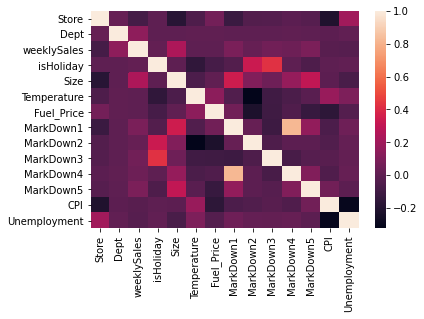

In [3]:
# Visualize correlation of features in our dataset
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix)
plt.show()

It seems that Date and Type is missing here.

So we need some preprocessing to explore our data again.

## 2. Manipulate training dataset

In [4]:
# Data Manipulation

# Creating new columns for each Type of store (Type_A, Type_B, etc.)
# Now, we can asign different weights to Types
dataset = pd.get_dummies(dataset, columns=["Type"])

# Changing NaNs in MarkDown Colums to 0s
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

# Converting Date to concrete columns like Day, Month, and Year
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year

# Now, we do not need Date column
dataset = dataset.drop(columns=["Date"])

dataset.head()

,Store,Dept,weeklySales,isHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Day,Month,Year
0,1,1,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,5,2,2010
1,1,1,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0,12,2,2010
2,1,1,41595.55,False,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,0,0,19,2,2010
3,1,1,19403.54,False,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,0,0,26,2,2010
4,1,1,21827.90,False,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,0,0,5,3,2010


## 1. Explore training dataset  (again...)

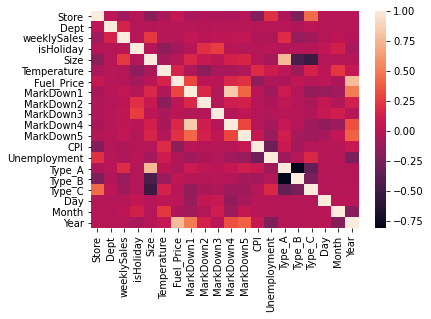

In [5]:
# Visualize correlation of features in our dataset
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix)
plt.show()

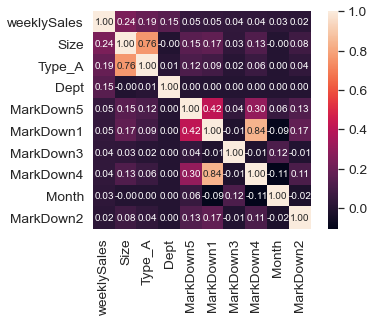

In [6]:
# Visualize weeklySales highest correlations with other features
# Number of variables for heatmap
k = 10
cols = corrMatrix.nlargest(k, 'weeklySales')['weeklySales'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 2. Manipulate training dataset (again...)

In [7]:
# Dropping columns that correlate bad with the output
# Notice that we will need 'IsHoliday' in calculation of error
dataset = dataset.drop(columns=["Store"])
dataset = dataset.drop(columns=["Temperature"])
dataset = dataset.drop(columns=["Fuel_Price"])
dataset = dataset.drop(columns=["CPI"])
dataset = dataset.drop(columns=["Unemployment"])
dataset = dataset.drop(columns=["Day"])
dataset = dataset.drop(columns=["Year"])
dataset = dataset.drop(columns=["Type_B"])
dataset = dataset.drop(columns=["Type_C"])

dataset.head()

,Dept,weeklySales,isHoliday,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type_A,Month
0,1,24924.50,False,151315,0.0,0.0,0.0,0.0,0.0,1,2
1,1,46039.49,True,151315,0.0,0.0,0.0,0.0,0.0,1,2
2,1,41595.55,False,151315,0.0,0.0,0.0,0.0,0.0,1,2
3,1,19403.54,False,151315,0.0,0.0,0.0,0.0,0.0,1,2
4,1,21827.90,False,151315,0.0,0.0,0.0,0.0,0.0,1,3


## 3. Apply CV to training dataset

In [8]:
kf = KFold(n_splits=5, shuffle=True) 

for train_index, test_index in kf.split(dataset):
    print("Train:", train_index, "Validation:", test_index)

Train: [     0      2      3 ... 421567 421568 421569] Validation: [     1      4     11 ... 421551 421552 421557]
Train: [     0      1      2 ... 421567 421568 421569] Validation: [    30     33     37 ... 421549 421561 421566]
Train: [     0      1      2 ... 421567 421568 421569] Validation: [     3      7     10 ... 421556 421559 421562]
Train: [     0      1      2 ... 421566 421567 421568] Validation: [     9     13     16 ... 421510 421554 421569]
Train: [     1      3      4 ... 421562 421566 421569] Validation: [     0      2      5 ... 421565 421567 421568]


## 4. Run chosen algorithms

In [9]:
# Choose model by changing model_name

# Default model
model_name = 'LinearRegression'

# Return model by its name
def choose_model(model_name):
    if model_name == 'LinearRegression':
        return LinearRegression()
    elif model_name == 'NeuralNetwork':
        return MLPRegressor(hidden_layer_sizes=(10,), activation='relu', verbose=1)
    elif model_name == 'RandomForest':
        return RandomForestRegressor(n_estimators=100, verbose=1)
    elif model_name == 'ExtraTrees':
        return ExtraTreesRegressor(n_estimators=100, verbose=1)
    else:
        return model_name

# Predict using model and test_x
def predict(model, test_x):
    return pd.Series(model.predict(test_x))

# Train the chosen model
def train_model(train_x, train_y):
    model = choose_model(model_name)
    model.fit(train_x, train_y)
    return model

# Calculate weighted mean absolute error
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

### 4.1. Linear Regression

No need to select the best hyperparameters, because there is no hyperparameter.

In [10]:
# Run linear regression algorithm
model_name = 'LinearRegression'

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

15150.609857285304
16104.39888308818
15503.945392670836
15625.05779926376
15967.492563616695


15670.300899184955

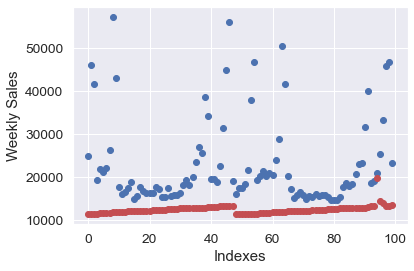

In [11]:
# Get predictions on training dataset
dataset2pred = dataset.drop(columns=['weeklySales'])
predicted = predict(model, dataset2pred)

# Plot actual outputs and our predictions for first 100 examples
plt.plot(dataset['weeklySales'][:100], 'bo')
plt.plot(np.array(predicted[:100]), 'ro')
plt.ylabel('Weekly Sales')
plt.xlabel('Indexes')
plt.show()

### 4.2. Neural Network (MLPRegressor)

In [12]:
# Run MLPRegressor algorithm
model_name = 'NeuralNetwork'

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

Iteration 1, loss = 265468642.47336140
Iteration 2, loss = 242046217.01576510
Iteration 3, loss = 241891013.15576178
Iteration 4, loss = 241684944.97986516
Iteration 5, loss = 241551968.27803203
Iteration 6, loss = 241358237.34115878
Iteration 7, loss = 241127282.52276924
Iteration 8, loss = 240848831.92390972
Iteration 9, loss = 240522978.91270062
Iteration 10, loss = 240175659.46462795
Iteration 11, loss = 239703764.17685232
Iteration 12, loss = 239169159.02102998
Iteration 13, loss = 238643706.58376324
Iteration 14, loss = 238106361.43303978
Iteration 15, loss = 237612355.16985479
Iteration 16, loss = 237218562.17312571
Iteration 17, loss = 236899596.51991791
Iteration 18, loss = 236593391.29024220
Iteration 19, loss = 236391763.94169480
Iteration 20, loss = 236204722.22000703
Iteration 21, loss = 236050021.19216913
Iteration 22, loss = 235974384.81967241
Iteration 23, loss = 235897873.28526729
Iteration 24, loss = 235817046.41781247
Iteration 25, loss = 235807928.15054554
Iteration

Iteration 116, loss = 228101899.20509782
Iteration 117, loss = 228052727.81221738
Iteration 118, loss = 227909188.43516624
Iteration 119, loss = 227988092.81183136
Iteration 120, loss = 227931541.52631542
Iteration 121, loss = 227941727.03815684
Iteration 122, loss = 227925207.17371702
Iteration 123, loss = 227613953.88477165
Iteration 124, loss = 227712798.71452928
Iteration 125, loss = 227589435.66698590
Iteration 126, loss = 227547724.96906880
Iteration 127, loss = 227442989.23523238
Iteration 128, loss = 227494777.41991284
Iteration 129, loss = 227374332.53762633
Iteration 130, loss = 227360234.49747869
Iteration 131, loss = 227286003.43564042
Iteration 132, loss = 227183504.06462705
Iteration 133, loss = 227296329.36786938
Iteration 134, loss = 227141510.05594999
Iteration 135, loss = 227097921.66306904
Iteration 136, loss = 227032878.31359842
Iteration 137, loss = 227153270.54110211
Iteration 138, loss = 227034076.14260077
Iteration 139, loss = 226988227.82345983
Iteration 140, l

C:\Users\bakda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 254207314.98337260
Iteration 2, loss = 243426421.29440108
Iteration 3, loss = 243163456.62998861
Iteration 4, loss = 242904100.42085522
Iteration 5, loss = 242604187.53970453
Iteration 6, loss = 242259666.38039154
Iteration 7, loss = 241879982.67719370
Iteration 8, loss = 241466733.21436307
Iteration 9, loss = 240980080.90596104
Iteration 10, loss = 240505296.58491930
Iteration 11, loss = 239970086.64629215
Iteration 12, loss = 239399107.12608761
Iteration 13, loss = 238735837.60185942
Iteration 14, loss = 238242317.49781346
Iteration 15, loss = 237758853.51843295
Iteration 16, loss = 237291347.38878581
Iteration 17, loss = 237049494.75919002
Iteration 18, loss = 236678098.52709848
Iteration 19, loss = 236536168.55292025
Iteration 20, loss = 236382462.35947293
Iteration 21, loss = 236098537.33179250
Iteration 22, loss = 236046665.30926916
Iteration 23, loss = 235869652.73096609
Iteration 24, loss = 235643555.40427488
Iteration 25, loss = 235450237.92544615
Iteration

C:\Users\bakda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 301482506.15488189
Iteration 2, loss = 242889698.15464240
Iteration 3, loss = 242669665.57060230
Iteration 4, loss = 242308066.19691283
Iteration 5, loss = 241945549.26916015
Iteration 6, loss = 241633924.02632019
Iteration 7, loss = 241240717.48931158
Iteration 8, loss = 240782758.38435379
Iteration 9, loss = 240400272.03186703
Iteration 10, loss = 239967286.52910283
Iteration 11, loss = 239506503.54151464
Iteration 12, loss = 239217444.62428010
Iteration 13, loss = 238864767.77061838
Iteration 14, loss = 238536435.79401076
Iteration 15, loss = 238196672.02164117
Iteration 16, loss = 237836702.29054898
Iteration 17, loss = 237693839.27477917
Iteration 18, loss = 237458047.99265268
Iteration 19, loss = 237366799.03775182
Iteration 20, loss = 237248951.76184362
Iteration 21, loss = 237113512.47350353
Iteration 22, loss = 236997360.15736142
Iteration 23, loss = 236959788.38197860
Iteration 24, loss = 236908428.00339815
Iteration 25, loss = 236841585.33023888
Iteration

15194.464305684587

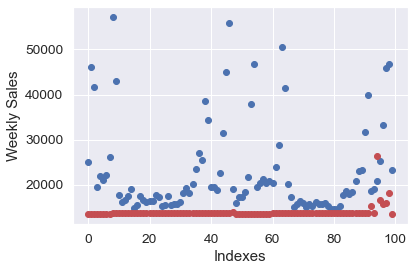

In [13]:
# Get predictions on training dataset
dataset2pred = dataset.drop(columns=['weeklySales'])
predicted = predict(model, dataset2pred)

# Plot actual outputs and our predictions for first 100 examples
plt.plot(dataset['weeklySales'][:100], 'bo')
plt.plot(np.array(predicted[:100]), 'ro')
plt.ylabel('Weekly Sales')
plt.xlabel('Indexes')
plt.show()

### 4.3. Extra Trees Regressor

In [14]:
# Run Extra Trees Regressor algorithm
model_name = 'ExtraTrees'

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


2977.244485649731


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


3046.6470098822465


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


2879.089979788549


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


2988.235151817186


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3013.964197596828


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


2981.036164946908

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.0s finished


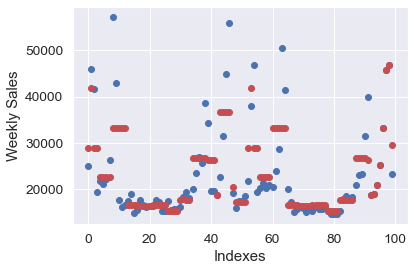

In [15]:
# Get predictions on training dataset
dataset2pred = dataset.drop(columns=['weeklySales'])
predicted = predict(model, dataset2pred)

# Plot actual outputs and our predictions for first 100 examples
plt.plot(dataset['weeklySales'][:100], 'bo')
plt.plot(np.array(predicted[:100]), 'ro')
plt.ylabel('Weekly Sales')
plt.xlabel('Indexes')
plt.show()

### 4.4. Random Forest Regressor

In [16]:
# Run Random Forest Regressor algorithm
model_name = 'RandomForest'

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


2633.2949634818237


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


2747.4126521420594


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


2553.058597328724


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


2628.4543244598617


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2712.1329012333476


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


2654.8706877291634

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.2s finished


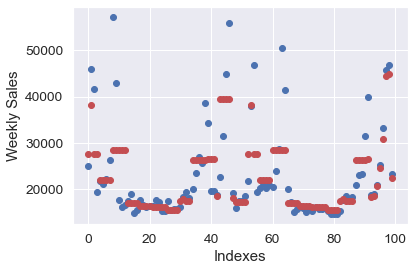

In [17]:
# Get predictions on training dataset
dataset2pred = dataset.drop(columns=['weeklySales'])
predicted = predict(model, dataset2pred)

# Plot actual outputs and our predictions for first 100 examples
plt.plot(dataset['weeklySales'][:100], 'bo')
plt.plot(np.array(predicted[:100]), 'ro')
plt.ylabel('Weekly Sales')
plt.xlabel('Indexes')
plt.show()

## 5. Select hyperparameters
### 5.1. Choosing n_estimators

In [18]:
# Run neyral network
model_name = RandomForestRegressor(n_estimators=50, verbose=1)

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


2768.3010965370036


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


2740.4838446857557


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


2600.036577609264


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


2607.7524392411706


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2593.275578568075


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


2661.9699073282536

In [19]:
# Run neyral network
model_name = RandomForestRegressor(n_estimators=100, verbose=1)

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


2583.2428765729137


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


2429.6280056040628


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


2617.2180975299343


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


2836.94787292916


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2844.1364831010724


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


2662.234667147429

In [20]:
# Run neural network
model_name = RandomForestRegressor(n_estimators=150, verbose=1)

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.5s finished


2515.702453483989


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished


2793.1746069555707


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished


2748.316228404509


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished


2534.816122617009


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2718.8165346986543


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished


2662.165189231946

### 5.2. Choosing max_depth

In [21]:
# Run neyral network
model_name = RandomForestRegressor(n_estimators=100, max_depth=9, verbose=1)

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


5943.836344764696


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


5958.215345969603


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


5822.412748723269


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


6120.847086462594


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5812.037153091983


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


5931.469735802429

In [22]:
# Run neyral network
model_name = RandomForestRegressor(n_estimators=100, max_depth=15, verbose=1)

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


3111.4380042054804


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


3048.8250231770103


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


3174.4295552221033


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


3083.2930998990946


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3295.4525501878256


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


3142.6876465383025

In [23]:
# Run neyral network
model_name = RandomForestRegressor(n_estimators=100, max_depth=22, verbose=1)

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


2722.2759429305397


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


2717.314916078953


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


2459.8529349520722


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


2647.4042003466907


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2726.784805905231


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


2654.726560042697

In [24]:
# Run neural network
model_name = RandomForestRegressor(n_estimators=100, max_depth=None, verbose=1)

# CV error
error_cv = 0

# Loop through each possible testing fold
for train_index, test_index in kf.split(dataset):
    
    # Divide dataset according to folds
    dataset_train = pd.DataFrame(dataset, index=train_index)
    dataset_test = pd.DataFrame(dataset, index=test_index)
        
    # Obtain input and output matrices
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales'])
    
    # Train our model
    model = train_model(train_x, train_y)
    
    # Use our model to make predictions on testing set
    predicted = predict(model, test_x)
    
    # Calculate weighted mean error
    weights = test_x['isHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    print(error)
    
    # Accumulate all errors in error_cv
    error_cv += error
    
# Divide by number of folds
error_cv /= 5

error_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


2636.1199452075048


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


2630.5754303714925


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


2604.500912551077


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


2586.744692218166


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2788.499508522456


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


2649.2880977741397

## 6. Make predictions on testing dataset

In [25]:
# Test data preprocessing
test = pd.read_csv("test.csv", names=['Store','Dept','Date','isHoliday'], sep=',', header=0)
stores = pd.read_csv("stores.csv", names=['Store','Type','Size'], sep=',', header=0)

#Dropping repeated column 'IsHoliday'
features = pd.read_csv("features.csv", names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday'], sep=',', header=0).drop(columns=['IsHoliday'])

#Merging 3 datasets into one
test = test.merge(stores, how='left').merge(features, how='left')

# Data Manipulation

# Creating new columns for each Type of store (Type_A, Type_B, etc.)
# Now, we can asign different weights to Types
test = pd.get_dummies(test, columns=["Type"])

# Changing NaNs in MarkDown Colums to 0s
test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

# Converting Date to concrete column Month
test['Month'] = pd.to_datetime(test['Date']).dt.month

# Now, we do not need Date column
test = test.drop(columns=["Date"])

# Dropping unnecessary columns
test = test.drop(columns=["Store"])
test = test.drop(columns=["Temperature"])
test = test.drop(columns=["Fuel_Price"])
test = test.drop(columns=["CPI"])
test = test.drop(columns=["Unemployment"])
test = test.drop(columns=["Type_B"])
test = test.drop(columns=["Type_C"])

test.head()

,Dept,isHoliday,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type_A,Month
0,1,False,151315,6766.44,5147.70,50.82,3639.90,2737.42,1,11
1,1,False,151315,11421.32,3370.89,40.28,4646.79,6154.16,1,11
2,1,False,151315,9696.28,292.10,103.78,1133.15,6612.69,1,11
3,1,True,151315,883.59,4.17,74910.32,209.91,303.32,1,11
4,1,False,151315,2460.03,0.00,3838.35,150.57,6966.34,1,11


In [26]:
# Run best model on whole training set
model_name = 'RandomForest'

# Obtain input and output matrices
train_y = dataset['weeklySales']
train_x = dataset.drop(columns=['weeklySales'])
    
# Train our model
model = train_model(train_x, train_y)
    
# Use our model to make predictions on testing set
predicted_test = predict(model, test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.0s finished


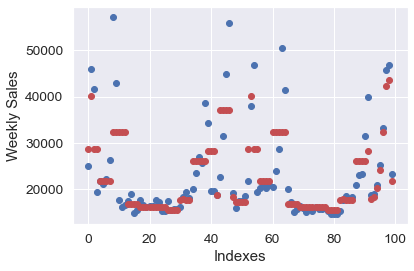

In [27]:
# Get predictions on training dataset
dataset2pred = dataset.drop(columns=['weeklySales'])
predicted = predict(model, dataset2pred)

# Plot actual outputs and our predictions for first 100 examples
plt.plot(dataset['weeklySales'][:100], 'bo')
plt.plot(np.array(predicted[:100]), 'ro')
plt.ylabel('Weekly Sales')
plt.xlabel('Indexes')
plt.show()

In [28]:
# Write the results into submission table

# Read testing dataset again (no changes there)
test = pd.read_csv("test.csv", names=['Store','Dept','Date','isHoliday'], sep=',', header=0)

# Add our output
test['Weekly_Sales'] = predicted_test

# Frame the table as asked
test['Id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test['Date'].astype(str)
test = test[['Id', 'Weekly_Sales']]
test.to_csv('output.csv', index=False)

Kaggle Submission shows that our score (WMAE) is 6385.58098,
which is better than that of literature, where it is 11517.09.